            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.9804110061124917
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     55042
           1       0.01      0.05      0.01        91

    accuracy                           0.98     55133
   macro avg       0.50      0.52      0.50     55133
weighted avg       1.00      0.98      0.99     55133

KMeans Accuracy: 0.98041
KMeans AUC: 0.51844
KMeans Precision: 0.00501
KMeans Recall: 0.05495
KMeans F1 Score: 0.00917
0.9992200678359603
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.89      0.60      0.72        91

    accuracy                           1.00     55133
   macro avg       0.94      0.80      0.86     55133
weighted avg       1.00      1.00      1.00     55133

Logistic Regression Accuracy: 0.99922
Logistic Regression AUC: 0.80213
Logistic Regression Precision: 0.88710
Logistic Regression Recall: 0.60440
Logistic Regression F1 Score: 0.71895


/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


              precision    recall  f1-score   support

           0       1.00      0.97      0.98     55042
           1       0.00      0.09      0.01        91

    accuracy                           0.96     55133
   macro avg       0.50      0.53      0.49     55133
weighted avg       1.00      0.96      0.98     55133

Balanced KMeans Accuracy: 0.96400
Balanced KMeans AUC: 0.52668
Balanced KMeans Precision: 0.00419
Balanced KMeans Recall: 0.08791
Balanced KMeans F1 Score: 0.00800
0.9839479077866251
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     55042
           1       0.08      0.82      0.14        91

    accuracy                           0.98     55133
   macro avg       0.54      0.90      0.57     55133
weighted avg       1.00      0.98      0.99     55133

Balanced Logistic Regression Accuracy: 0.98395
Balanced Logistic Regression AUC: 0.90419
Balanced Logistic Regression Precision: 0.07945
Balanced Logistic Regressi

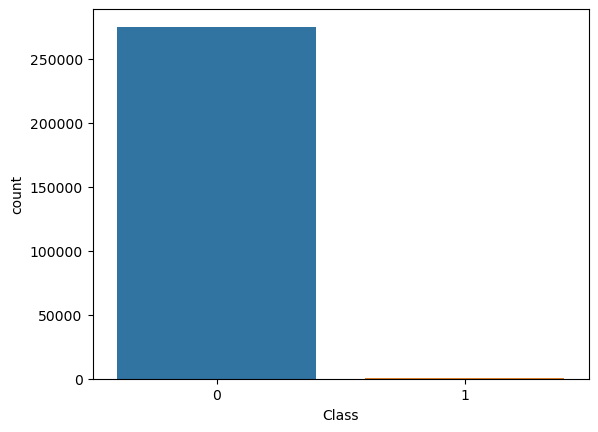

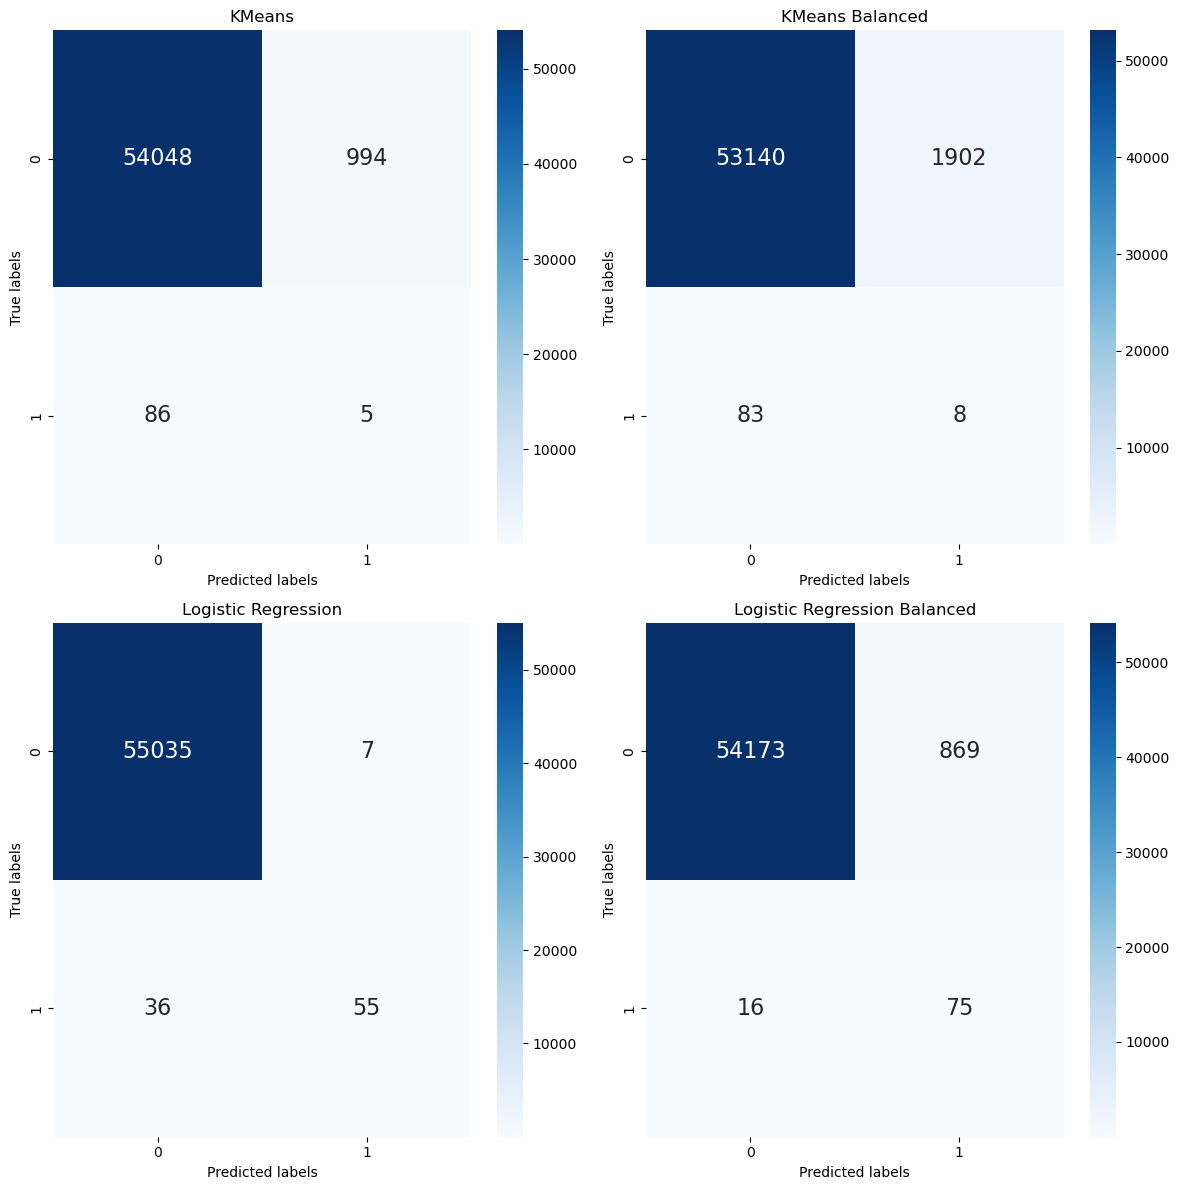

In [2]:
# Required libraries importation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics

# Load and display credit card data
dataframe = pd.read_csv("creditcard.csv")
print(dataframe)

# Display initial and final rows of the data
dataframe.head()
dataframe.tail()

# Dimensions of the dataset
dataframe.shape

# Details about the dataset's structure
dataframe.info()

# Eliminate 'Time' feature as it is not essential for analysis
dataframe.drop(columns=['Time'], inplace=True)

# Remove duplicate entries to optimize queries and storage
dataframe_cleaned = dataframe.drop_duplicates()
print("Duplicate entries removed successfully")

# Analyze distribution of the 'Class' feature and visualize it
fraud_counts = dataframe_cleaned['Class'].value_counts()
print(fraud_counts)
sns.countplot(data=dataframe_cleaned, x='Class')

# Split data into predictors and response
predictors = dataframe_cleaned.iloc[:, :-1]
response = dataframe_cleaned.iloc[:, -1]

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

# Feature selection using ANOVA F-test
from sklearn.feature_selection import SelectKBest, f_classif
feature_selector = SelectKBest(score_func=f_classif, k='all')
feature_selector.fit(X_train, y_train)

X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)

# Model building
# KMeans clustering on imbalanced dataset
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_score, recall_score, f1_score

kmeans_model = KMeans(n_clusters=2, random_state=0, algorithm="elkan", max_iter=10000)
kmeans_model.fit(X_train_selected)
kmeans_predictions = kmeans_model.predict(X_test_selected)

# Evaluate KMeans model
print(accuracy_score(y_test, kmeans_predictions))
print(classification_report(y_test, kmeans_predictions))
print(f'KMeans Accuracy: {accuracy_score(y_test, kmeans_predictions):.5f}')
print(f'KMeans AUC: {roc_auc_score(y_test, kmeans_predictions):.5f}')
print(f'KMeans Precision: {precision_score(y_test, kmeans_predictions):.5f}')
print(f'KMeans Recall: {recall_score(y_test, kmeans_predictions):.5f}')
print(f'KMeans F1 Score: {f1_score(y_test, kmeans_predictions):.5f}')

# Logistic Regression on imbalanced data
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_selected, y_train)
logistic_predictions = logistic_model.predict(X_test_selected)

# Evaluate Logistic Regression model
print(accuracy_score(y_test, logistic_predictions))
print(classification_report(y_test, logistic_predictions))
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, logistic_predictions):.5f}')
print(f'Logistic Regression AUC: {roc_auc_score(y_test, logistic_predictions):.5f}')
print(f'Logistic Regression Precision: {precision_score(y_test, logistic_predictions):.5f}')
print(f'Logistic Regression Recall: {recall_score(y_test, logistic_predictions):.5f}')
print(f'Logistic Regression F1 Score: {f1_score(y_test, logistic_predictions):.5f}')

# Data balancing with SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_selected, y_train)

# KMeans clustering on balanced dataset
kmeans_balanced = KMeans(n_clusters=2, random_state=0)
kmeans_balanced.fit(X_train_resampled)
kmeans_balanced_predictions = kmeans_balanced.predict(X_test_selected)

# Evaluate KMeans model on balanced data
print(classification_report(y_test, kmeans_balanced_predictions))
print(f'Balanced KMeans Accuracy: {accuracy_score(y_test, kmeans_balanced_predictions):.5f}')
print(f'Balanced KMeans AUC: {roc_auc_score(y_test, kmeans_balanced_predictions):.5f}')
print(f'Balanced KMeans Precision: {precision_score(y_test, kmeans_balanced_predictions):.5f}')
print(f'Balanced KMeans Recall: {recall_score(y_test, kmeans_balanced_predictions):.5f}')
print(f'Balanced KMeans F1 Score: {f1_score(y_test, kmeans_balanced_predictions):.5f}')

# Logistic Regression on balanced dataset
logistic_balanced = LogisticRegression(max_iter=1000)
logistic_balanced.fit(X_train_resampled, y_train_resampled)
logistic_balanced_predictions = logistic_balanced.predict(X_test_selected)

# Evaluate Logistic Regression model on balanced data
print(accuracy_score(y_test, logistic_balanced_predictions))
print(classification_report(y_test, logistic_balanced_predictions))
print(f'Balanced Logistic Regression Accuracy: {accuracy_score(y_test, logistic_balanced_predictions):.5f}')
print(f'Balanced Logistic Regression AUC: {roc_auc_score(y_test, logistic_balanced_predictions):.5f}')
print(f'Balanced Logistic Regression Precision: {precision_score(y_test, logistic_balanced_predictions):.5f}')
print(f'Balanced Logistic Regression Recall: {recall_score(y_test, logistic_balanced_predictions):.5f}')
print(f'Balanced Logistic Regression F1 Score: {f1_score(y_test, logistic_balanced_predictions):.5f}')

# Visualization of confusion matrices
confusion_matrices = {
    'KMeans': metrics.confusion_matrix(y_test, kmeans_predictions),
    'KMeans Balanced': metrics.confusion_matrix(y_test, kmeans_balanced_predictions),
    'Logistic Regression': metrics.confusion_matrix(y_test, logistic_predictions),
    'Logistic Regression Balanced': metrics.confusion_matrix(y_test, logistic_balanced_predictions)
}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
for ax, (title, matrix) in zip(axes.flatten(), confusion_matrices.items()):
    sns.heatmap(pd.DataFrame(matrix), annot=True, fmt='g', ax=ax, cmap='Blues', annot_kws={"size": 16})
    ax.set_title(title)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

fig.tight_layout()
plt.show()


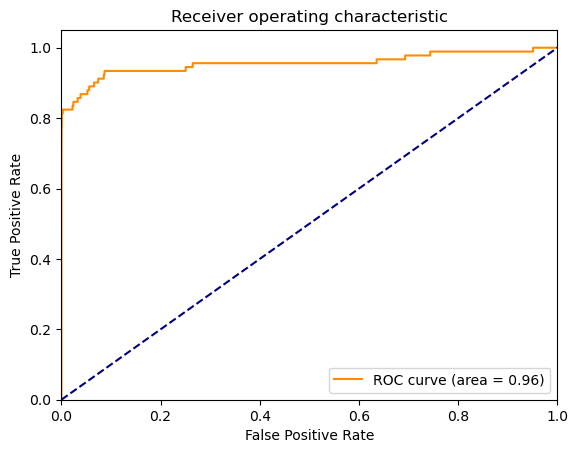

In [3]:
# Plot ROC curve and calculate AUC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Get the predicted probabilities for the positive class
y_score = logistic_balanced.predict_proba(X_test_selected)[:, 1]
# Compute the ROC curve and the AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
